# Estadística Bayesiana
## Regresión lineal



Recordemos que el objetivo de hacer regresión es describir el cambio en una variable, $Y$, en función de un conjunto de otras variables (regresores), $x=(x_1,\ldots,x_p)$. En el modelo de regresión lineal se especifica que

$$
\mathbb{E}(Y|x) = \beta_1 x_1 + \ldots + \beta_p x_p = \mathbf{\beta^{T} x}
$$

En particular, si proponemos que los errores se distribuyen de manera independiente y normal,

$$
\epsilon _1,\ldots,\epsilon_n \sim \mathcal{N}(0, \sigma^2)
$$

entonces la densidad conjunta de los datos observados, $y_i$, dado $\mathbf{x}$ y el valor de los parámetros, $\mathbf{\beta}$ y $\sigma^2$ es,

$$
\begin{align*}
p(y_1,\ldots,y_n|\mathbf{x,\beta},\sigma^2) &= \prod_{i=1}^{n} p(y_i | \mathbf{x}_i, \beta, \sigma^2) \\
&= (2\pi\sigma^{2})^{-n/2} \exp{\left( -\frac{1}{2\sigma^{2}} \sum_{i=1}^{n}(y_i - \mathbf{\beta}^{T} \mathbf{x}_i)^{2}  \right)}
\end{align*}
$$

Es decir, $\mathbf{Y|X,\beta}\sigma^2 \sim \mathbf{N}(\mathbf{X\beta}, \sigma^2 \mathbf{I}_p)$, con $\mathbf{X}\in\mathcal{M}_{n\times p}(\mathbb{R})$ la matriz de diseño, $\mathbf{y}=(y_1,\ldots,y_n)^{T}$, $\mathbf{\beta} = (\beta_1,\ldots,\beta_p)$, $\mathbf{x}_i = (x_{i,1}, \ldots, x_{i,p})$ e $\mathbf{I}$ la matriz identidad de tamaño $p\times p$.

El estimador de mínimos cuadrados está dado por

$$
\hat{\mathbf{\beta}}_{ols} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T} \mathbf{y}
$$

el cual es único si y solo si $\mathbf{X}^{T}\mathbf{X}$ es invertible.

### Ejemplo

Veinte hombres saludables que no hacían ejercicio con regularidad fueron recrutados para ser parte de un estudio sobre los efectos de dos regímenes de ejercicio en el consumo de oxígeno. Se seleccionaron aleatoriamente seis de los doce hombres y se les asignó un programa de 12 semanas donde debían correr sobre una superficie plana. A los restantes seis se les asignó un programa aeróbico. El consumo máximo de oxígeno (Y) de cada individuo fue medido (en litros por minuto) mientras corrían sobre una superficie inclinada, antes y después de los programas de 12 semanas. Nos interesa estudiar el cambio en el consumo máximo en función del programa tomado y de la edad de los individuos.

Los datos recopilados de las edades son:

$$
(23, 22, 22, 25, 27, 20, 31, 23, 27, 28, 22, 24)
$$

los del consumo máximo de oxígeno son

$$
(-0.87, -10.74, -3.27, -1.97, 7.50, -7.25, 17.05, 4.96, 10.40, 11.05, 0.26, 2.51)
$$

Los primeros 6 datos corresponden al grupo de corredores, mientras que los restantes 6 corresponden al grupo aeróbico.

#### Usando OLS

In [ ]:
import numpy as np
from numpy.random import gamma, multivariate_normal
from numpy.linalg import inv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [ ]:
x_2 = np.append(np.zeros((1,6)), np.ones((1,6)))
x_3 = np.array([23, 22, 22, 25, 27, 20, 31, 23, 27, 28, 22, 24])
x_4 = x_2 * x_3

In [ ]:
x_2

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [ ]:
x_3

array([23, 22, 22, 25, 27, 20, 31, 23, 27, 28, 22, 24])

In [ ]:
x_4

array([ 0.,  0.,  0.,  0.,  0.,  0., 31., 23., 27., 28., 22., 24.])

In [ ]:
X = np.asmatrix([x_2, x_3, x_4]).T

In [ ]:
X

matrix([[ 0., 23.,  0.],
        [ 0., 22.,  0.],
        [ 0., 22.,  0.],
        [ 0., 25.,  0.],
        [ 0., 27.,  0.],
        [ 0., 20.,  0.],
        [ 1., 31., 31.],
        [ 1., 23., 23.],
        [ 1., 27., 27.],
        [ 1., 28., 28.],
        [ 1., 22., 22.],
        [ 1., 24., 24.]])

In [ ]:
Y = np.array([-0.87, -10.74, -3.27, -1.97, 7.50, -7.25, 17.05, 4.96, 10.40, 11.05, 0.26, 2.51]).reshape(-1,1)

In [ ]:
Y

array([[ -0.87],
       [-10.74],
       [ -3.27],
       [ -1.97],
       [  7.5 ],
       [ -7.25],
       [ 17.05],
       [  4.96],
       [ 10.4 ],
       [ 11.05],
       [  0.26],
       [  2.51]])

In [ ]:
model_osl = sm.GLS(Y, sm.add_constant(X)).fit()
model_osl.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            GLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     25.36
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           0.000194
Time:                        17:27:40   Log-Likelihood:                -27.465
No. Observations:                  12   AIC:                             62.93
Df Residuals:                       8   BIC:                             64.87
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.2939     12.252     -4.187      0.003     -79.548     -23.040
x1            13.1071     15.762      0.832      0.430     -23.240      49.454
x2             2.0947      0.526      3.980      0.004       0.881       3.308
x3            -0.3182      0.650     -0.490      0.637      -1.817       1.180
==============================================================================
Omnibus:                        3.402   Durbin-Watson:                   2.680
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.760
Skew:                          -0.938   Prob(JB):                        0.415
Kurtosis:                       2.951   Cond. No.                         650.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

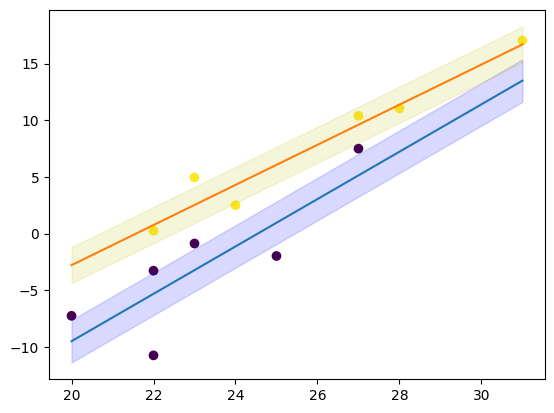

In [ ]:
# Grupo corredor
m_1, b_1 = 2.09, -51.29
# Grupo aeróbico
m_2, b_2 = 1.77, -38.18


dom = np.linspace(np.min(x_3), np.max(x_3))
y_1 = m_1 * dom + b_1
y_2 = m_2 * dom + b_2
ci_1 = 1.96 * np.std(y_1)/np.sqrt(len(dom))
ci_2 = 1.96 * np.std(y_2)/np.sqrt(len(dom))
plt.scatter(x_3, Y, c=x_2)
plt.plot(dom, y_1)
plt.fill_between(dom, y_1-ci_1,y_1+ci_1, color='b', alpha=.15)
plt.plot(dom, y_2);
plt.fill_between(dom, y_2-ci_2,y_2+ci_2, color='y', alpha=.15);

#### Usando estimación bayesiana

Usando el paradigma bayesiano, debemos asignar distribuciones iniciales a los parámetros: $\mathbf{\beta}$ y $\sigma^{2}$. El modelo estadístico bayesiano propuesto es
1.
$$
\begin{align*}
p(\mathbf{y}|\mathbf{X, \beta}, \sigma^{2}) &= (2\pi\sigma^{2})^{-n/2} \exp{\left( -\frac{1}{2\sigma^{2}} \sum_{i=1}^{n}(y_i - \mathbf{\beta}^{T} \mathbf{x}_i)^{2}  \right)}\\
  &\propto \exp{\left(-\frac{1}{2\sigma^{2}} SSR(\beta)\right)} \\
  &= \exp{\left(-\frac{1}{2\sigma^{2}} [\mathbf{y}^{T}\mathbf{y} - 2\beta^{T} \mathbf{X}^{T}\mathbf{y} + \beta^{T}\mathbf{X}^{T} \mathbf{X} \beta]\right)}
\end{align*}
$$
2.
$$
p(\beta) \propto \exp{\left( -\frac{1}{2}(-2\beta^{T} \Sigma_{0}^{-1}\beta_{0} + \beta^{T}\sigma_{0}^{-1} \beta) \right)}
$$
3.
$$
p(\sigma^{2}) \propto \left(\frac{1}{\sigma^{2}}\right)^{-\nu_0/2 - 1} \exp{(-(\nu_0 \sigma_0 ^{2} /2)\sigma^{2})}
$$

Con estas distribuciones podemos calcular las condicionales completas

$$
\begin{align*}
p(\beta | \mathbf{y},\mathbf{X},\sigma^{2}) &\propto p(\mathbf{y} | \mathbf{X}, \beta, \sigma^{2}) p(\beta)\\
p(\sigma^{2} | \mathbf{y},\mathbf{X}, \beta) &\propto p(\mathbf{y} | \mathbf{X}, \beta, \sigma^{2}) p(\sigma^{2})
\end{align*}
$$

y usar el algoritmo de Gibbs para generar una colección de valores $\{ (\beta_i , \sigma_i ^{2}) \}_i$ para aproximar las cantidades posteriores (e.g la media posterior para cada parámetro).

__Ejercicio moral__: Hacerlo

Hint:
$$
\begin{align*}
\beta | \mathbf{y}, \mathbf{X}, \sigma^{2} &\sim \mathcal{N}\left(  (\Sigma_0^{-1} + \mathbf{X}^{T}\mathbf{X}/\sigma^{2})^{-1} (\Sigma_0^{-1} \beta_0 + \mathbf{X}^{T}\mathbf{y}/\sigma^{2}), (\Sigma_0^{-1} + \mathbf{X}^{T}\mathbf{X}/\sigma^{2})^{-1}  \right)\\
\sigma^{2} | \mathbf{y}, \mathbf{X}, \beta &\sim \text{gamma-inversa} \left((\nu_0 + 2)/2, (\nu_0 \sigma_0^{2} + SSR(\beta))/2 \right)
\end{align*}
$$



---
Aquí procederemos usando el _Principio de invarianza_,

__Principio de invarianza (versión light)__:
Las propiedades de los procedimientos estadísticos no deben depender de las unidades de medición.

En particular, podemos pedir que los estimadores sean _invariantes bajo escalamientos_, es decir, que no dependan de la escala de medición usada (e.g km, m, cm).

Es decir, si $\mathbf{X}$ es el conjunto de regresores y $\mathbf{X}^{*} = \mathbf{XH}$ p.a transformación $\mathbf{X}\in\mathcal{M}_{p\times p}(\mathbb{R})$, entonces las distribuciones posteriores, $\beta | \mathbf{y, X}$ y $\mathbf{H}\beta^{*} | \mathbf{y, X^{*}}$ deben coindicir.

---

Con la consideración anterior, se puede demostrar que tomando $\beta_0 = \mathbf{0}$ y $\Sigma_0 = k (\mathbf{X}^{T}\mathbf{X})^{-1}$ p.a $k>0$, se cumple la invarianza. Zellner (1986) propone tomar  $k=g \sigma^{2}$, p.a $g > 0$ (es decir, relaciona $k$ con la varianza).
Con lo anterior, se puede llegar a que

$$
\begin{align*}
\beta | \mathbf{y}, \mathbf{X}, \sigma^{2} &\sim \mathcal{N} \left( \frac{g}{g+1} (\mathbf{X}^{T}\mathbf{X})^{-1} \mathbf{X}^{T}\mathbf{y},\frac{g}{g+1} \sigma^{2}(\mathbf{X}^{T}\mathbf{X})^{-1} \right)\\
\sigma^{2} | \mathbf{y}, \mathbf{X} &\sim \text{gamma-inversa}\left( \frac{\nu_0 + n}{2}, \frac{\nu_0 \sigma_0 ^{2} + SSR_g}{2} \right)
\end{align*}
$$
con $SSR_g = \mathbf{y}^{T} (\mathbf{I} - \frac{g}{g+1} \mathbf{X}(\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T})\mathbf{y}$.

Note que no es necesario usar MCMC para simular las muestras, porque para generar una observación $(\sigma_{i}^{2}, \beta_{i})$ de $p(\sigma^{2}, \beta | \mathbf{y}, \mathbf{X})$ basta:

1. Generar $1/\sigma_{i}^{2} \sim \text{gamma}\left( \frac{\nu_0 + n}{2}, \frac{\nu_0 \sigma_0 ^{2} + SSR_g}{2} \right)$.
2. Generar $\beta_{i} \sim \mathcal{N} \left( \frac{g}{g+1} (\mathbf{X}^{T}\mathbf{X})^{-1} \mathbf{X}^{T}\mathbf{y},\frac{g}{g+1} \sigma_{i}^{2}(\mathbf{X}^{T}\mathbf{X})^{-1} \right)$

y dar el estimador de Monte Carlo.

In [ ]:
sample_size = 1000
g = 12
n = 12
p = 12
nu_0 = 1
sigma_0_2 = 8.54

_X = np.hstack((np.ones([X.shape[0], 1], X.dtype), X))
SSR_g = Y.T * ( np.eye(p) - (g / (g+1) ) * _X * inv(_X.T * _X) * _X.T ) * Y

sample = {"sigma2": [], "beta": []}

shape_g = (nu_0 + n) / 2
rate_g = (nu_0 * sigma_0_2 + SSR_g) / 2
mean_n = (g / (g + 1)) * model_osl.params
cov_n = ((g / (g + 1)) * inv(_X.T * _X))

for i in range(sample_size):
  _sigma2 = 1 / gamma(shape=shape_g, scale=1/rate_g)[0][0]
  _beta = multivariate_normal(mean=mean_n, cov=_sigma2*cov_n)
  sample["sigma2"].append(_sigma2)
  sample["beta"].append([_beta[0], _beta[1], _beta[2], _beta[3]])

sample["beta"] = np.array(sample["beta"])

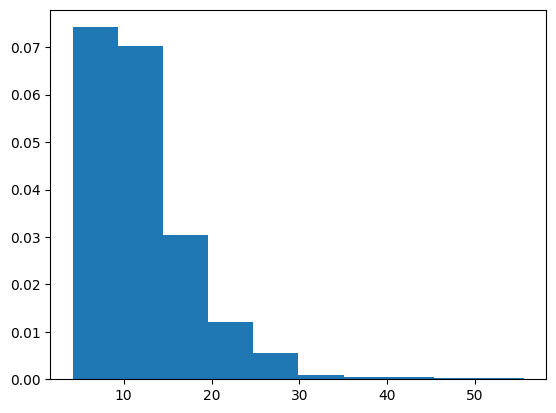

In [ ]:
plt.hist(sample["sigma2"], density=True);

-48.236636794478194
12.970803882214804
1.9755079310346142
-0.33498305408378026


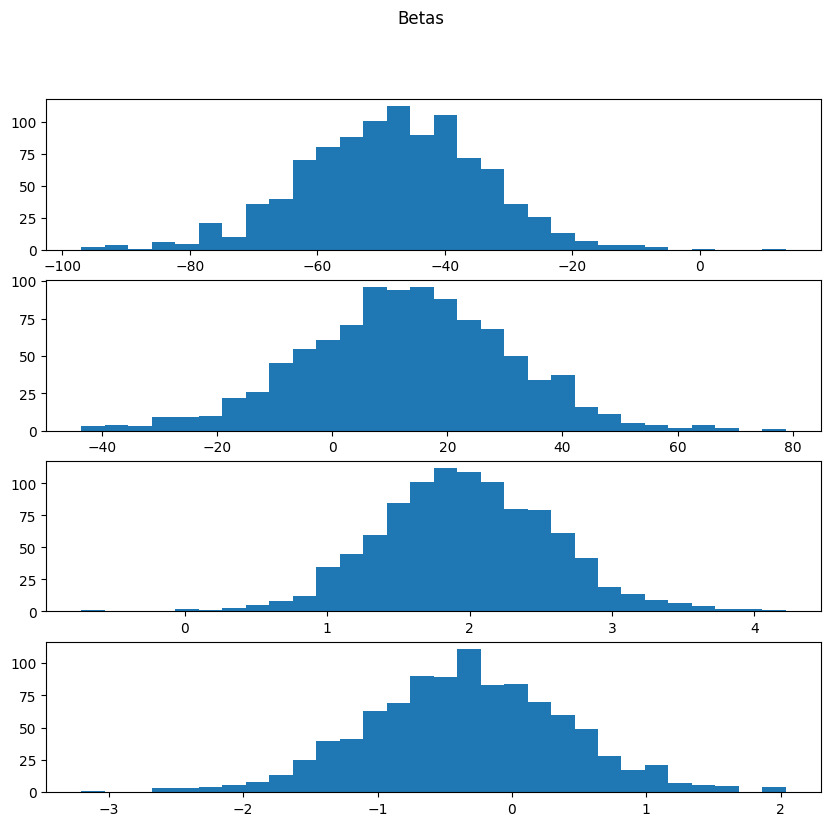

In [ ]:
fig, axs = plt.subplots(4, figsize=(10, 9))
fig.suptitle('Betas')
for i in range(4):
  print(np.mean(sample["beta"][:,i]))
  axs[i].hist(sample["beta"][:,i], bins=30)


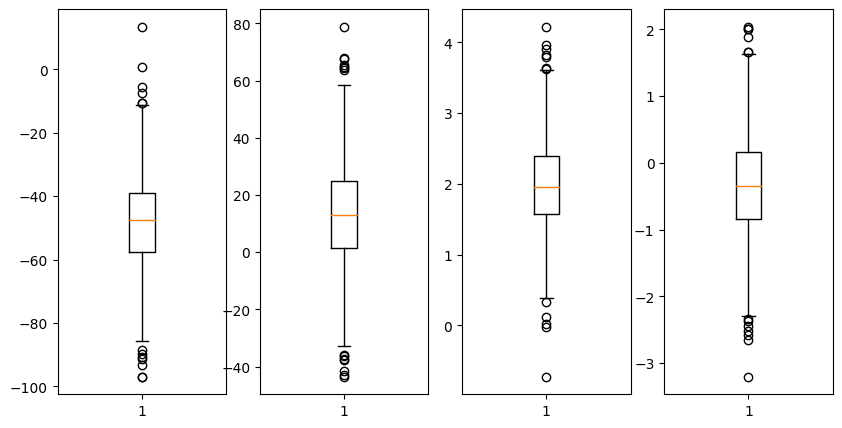

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10, 5))
for i in range(4):
  axs[i].boxplot(sample["beta"][:,i])


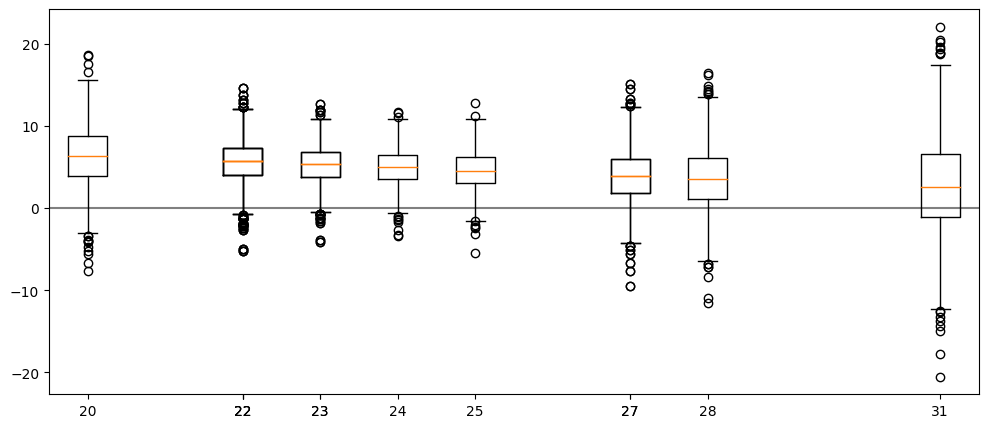

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

beta_2 = sample["beta"][:, 1]
beta_4 = sample["beta"][:, 3]

data = [beta_2 + beta_4 * age for age in x_3]

plt.axhline(0, color="gray")
ax.boxplot(data, positions=x_3, meanline=True);


_Tarea moral_: Graficar las regresiones tanto para el grupo corredor como para el aeróbico con sus intervalos de confianza y compararlo con la regresión por mínimos cuadrados.

###### Referencias
1. A First Course in Bayesian Statistical Methods - Springer
2. The Bayesian Choide - Springer
3. Bayesian Computations with R - Springer